# US Bike Share Project

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction


Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, we will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. we will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. we will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, we should start by asking questions we might want to understand about the bike share data. Consider, for example, if we were working for Motivate. What kinds of information would we want to know about in order to make smarter business decisions? If we were a user of the bike-share service, what factors might influence how we would want to use the service?

            1. how many users are using my service in a particular region/city?
            2. what is the peak time ie) At what time, more people are  using my service?
            3. How many repetitve customers?
            4. In one month how many distance people are travelling (cummlative) using my service ?
            5. What are all the different types of services they are providing so that i can select the one that is suitable for                me? 
            6. Is the service easily accessible? ie) do i have to travel far to avail the service 
            7. If i didnt like the service. will they refund or find a solution immeditaely ?
           


<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If we visit these pages, we will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. The data has already been collected in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. 
 

In [1]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

In [57]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        ## Use the csv library to set up a DictReader object. ##
    
        trip_reader = csv.DictReader(f_in)
    
        ## Read the first trip from the data file and store it in a variable.     ##
        
        first_trip = trip_reader.__next__()
        

        
        
        ##  Use the pprint library to print the first trip. ##
        pprint(first_trip)
        
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip
    



City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

Now, we should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When we set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

we will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, we will convert the Washington labels to match the other two.


In [58]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 

    """
    # CODE HERE
  
    if city == 'NYC' or city == 'Chicago':
        trip_dur = int(datum['tripduration'])
        duration = (trip_dur / 60)
        
    elif city == 'Washington':
        trip_dur_was = int(datum['Duration (ms)'])
        
        duration = (trip_dur_was/(1000*60))
        
        
        
        
    
        
   
    return duration


tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [63]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Washington has different category names compared to Chicago
    and NYC. 
    """
    global user_type
    
    if city == 'NYC' or city == 'Chicago':
        user_type = datum['usertype']
    elif city == 'Washington' and datum['Member Type'] == 'Registered':
        datum['Member Type'] = 'Subscriber'
        user_type = datum['Member Type']
    elif city == 'Washington' and datum['Member Type'] == 'Casual':
        datum['Member Type'] = 'Customer'
        user_type = datum['Member Type'] 
    
    return user_type


tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

In [60]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    NYC includes seconds, while Washington and Chicago do not.
    
    """
    
  
    if city == 'NYC':
        t = datum['starttime']
        mymonth = datetime.strptime(t,'%m/%d/%Y %H:%M:%S')
        month = int(mymonth.strftime('%-m'))
        hour = int(mymonth.strftime('%-H'))
        day_of_week = mymonth.strftime('%A')
        #print(month,hour,day_of_week)
    
    elif city == 'Chicago':
        t = datum['starttime']
        mymonth = datetime.strptime(t,'%m/%d/%Y %H:%M')
        month = int(mymonth.strftime('%-m'))
        hour = int(mymonth.strftime('%-H'))
        day_of_week = mymonth.strftime('%A')
        #print(month,hour,day_of_week)
        
    elif city == 'Washington':
        t = datum['Start date']
        mymonth = datetime.strptime(t,'%m/%d/%Y %H:%M')
        month = int(mymonth.strftime('%-m'))
        hour = int(mymonth.strftime('%-H'))
        day_of_week = mymonth.strftime('%A')
        #print(month,hour,day_of_week)
    
    
    return (month, hour, day_of_week)


tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [20]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        ## Tset up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)
        # collect data from and process each row
        temp = []
        for row in trip_reader:
            #print(row)
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}

            new_point['duration'] = duration_in_mins(row, city)
            
            month,hour,day_of_week = time_of_trip(row, city)
            new_point['month'] = month
            new_point['hour'] = hour
            new_point['day_of_week'] = day_of_week
            new_point['user_type'] = type_of_user(row, city)

            #print(new_point)
            #temp.append(new_point)
        #print(temp)
            #new_point = new_point
            trip_writer.writerow(new_point)
            
    

                
    
        
            
     
            
           
            
            
            
            
       

In [21]:
# Run this cell to check our work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


<a id='eda'></a>
## Exploratory Data Analysis

Now that we have the data collected and wrangled, we're ready to start exploring the data. In this section we will write  code to compute descriptive statistics from the data. we will also use `matplotlib` library to create  histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. 

1. Which city has the highest number of trips? 
2. Which city has the highest proportion of trips made by subscribers? 
3. Which city has the highest proportion of trips made by short-term customers?

In [22]:
#1

def trips_cities(filename):
    with open(filename, 'r') as f:
        reader = csv.DictReader(f)        
        n = 0        
        for row in reader:
            n +=1
        return n
    
def high_trips(city):
    data_files_n = './data/NYC-2016-Summary.csv'
    data_files_c =  './data/Chicago-2016-Summary.csv'
    data_files_w =  './data/Washington-2016-Summary.csv'
    
    chicago = trips_cities(data_files_c)
    #print(chicago)
    nyc = trips_cities(data_files_n)
    #print(nyc)
    washington = trips_cities(data_files_w)
    #print(washington)
    
    if chicago > nyc and chicago > washington:
        return 'The highest no. of trips recorded in chicago: {}'.format(chicago)
    elif nyc > washington and nyc > chicago:
        return 'The highest no. of trips recorded in nyc: {}'.format(nyc)
    else:
        return 'The highest no. of trips recorded in washington: {}'.format(washington)

print(high_trips(city))

The highest no. of trips recorded in nyc: 276798


In [23]:
#3

def number_of_customers(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        n_customers = 0
        
        for row in reader:
            if row['user_type'] == 'Customer':
                n_customers += 1
                
        return n_customers
                
def customer_propotion(data_file):
    data_file = './examples/BayArea-Y3-Summary.csv'
    data_files_n = './data/NYC-2016-Summary.csv'
    data_files_c =  './data/Chicago-2016-Summary.csv'
    data_files_w =  './data/Washington-2016-Summary.csv'
    
    chicago = number_of_customers(data_files_c)
    #print(chicago)
    nyc = number_of_customers(data_files_n)
    #print(nyc)
    washington = number_of_customers(data_files_w)
    #print(washington)
    
    tot_trip_c = trips_cities(data_files_c)
    tot_trip_n = trips_cities(data_files_n)
    tot_trip_w = trips_cities(data_files_w)
    
    chicago_prop = chicago / tot_trip_c
    nyc_prop = nyc / tot_trip_n
    washington_prop = washington / tot_trip_w
    
    if chicago_prop > nyc_prop and chicago_prop > washington_prop:
        return 'The highest propotion of customers recorded in chicago: {}'.format((round(chicago_prop,2)))
    elif nyc_prop > washington_prop and nyc_prop > chicago_prop:
        return 'The highest propotion of customers recorded in nyc: {}'.format((round(nyc_prop,2)))
    else:
        return 'The highest propotion of customers recorded in washington: {}'.format((round(washington_prop,2)))

print(customer_propotion(data_file))


The highest propotion of customers recorded in chicago: 0.24


In [25]:
#2

def number_of_subscribers(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0
        #n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
        return n_subscribers
    
def propotion(subscribers):
    subscribers = None
    data_file = './examples/BayArea-Y3-Summary.csv'
    data_files_n = './data/NYC-2016-Summary.csv'
    data_files_c =  './data/Chicago-2016-Summary.csv'
    data_files_w =  './data/Washington-2016-Summary.csv'
    
    chicago = number_of_subscribers(data_files_c)
    #print(chicago)
    nyc = number_of_subscribers(data_files_n)
    #print(nyc)
    washington = number_of_subscribers(data_files_w)
    #print(washington)
    
    tot_trip_c = trips_cities(data_files_c)
    tot_trip_n = trips_cities(data_files_n)
    tot_trip_w = trips_cities(data_files_w)
    
    chicago_prop = chicago / tot_trip_c
    nyc_prop = nyc / tot_trip_n
    washington_prop = washington / tot_trip_w
    
    if chicago_prop > nyc_prop and chicago_prop > washington_prop:
        return 'The highest propotion of subscribers recorded in chicago: {} '.format(round(chicago_prop,2))
    elif nyc_prop > washington_prop and nyc_prop > chicago_prop:
        return 'The highest propotion of subscribers recorded in nyc: {}'.format(round(nyc_prop,2))
    else:
        return 'The highest propotion of subscribers recorded in washington: {} '.format(round(washington_prop,2))

print(propotion(data_file))

The highest propotion of subscribers recorded in nyc: 0.89


Now, Lets write code to continue investigating properties of the data.

Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration.

1. What is the average trip length for each city? 
2. What proportion of rides made in each city are longer than 30 minutes?

In [28]:
#1

def trip_length(filename):
    total_trip = 0
    number_of_trip = 0
    Avg = 0
    with open(filename,'r') as f:
        trip_reader = csv.DictReader(f, delimiter=",")
        for row in trip_reader:
            number_of_trip += 1
            #print(row['duration'])
            total_trip += float(row['duration'])
        Avg = total_trip / number_of_trip
        return Avg

def avg_length(avg):
    data_files_n = './data/NYC-2016-Summary.csv'
    data_files_c =  './data/Chicago-2016-Summary.csv'
    data_files_w =  './data/Washington-2016-Summary.csv'
    data = './examples/BayArea-Y3-Summary.csv'
    
    chicago = trip_length(data_files_c)
    nyc = trip_length(data_files_n)
    washington = trip_length(data_files_w)
    d = trip_length(data)
    
    print('The Average trip length of Chicago: {} minutes'.format(round(chicago,0)))
    print('The Average trip length of nyc: {} minutes'.format(round(nyc,0)))
    print('The Average trip length of washington: {} minutes'.format(round(washington,0)))
    
    #print('The Average trip length of bayarea: {} minutes'.format(round(d,0)))
    
    
avg_length(data_file)

The Average trip length of Chicago: 17.0 minutes
The Average trip length of nyc: 16.0 minutes
The Average trip length of washington: 19.0 minutes


In [29]:
#2
def prop_duration(filename):
    count = 0
    with open(filename,'r') as f:
        trip_reader = csv.DictReader(f, delimiter=",")
        for row in trip_reader:
            if float(row['duration']) > 30:
                count += 1
        return count
        
def prop_length(propotion):
    
    
    data_files_n = './data/NYC-2016-Summary.csv'
    data_files_c =  './data/Chicago-2016-Summary.csv'
    data_files_w =  './data/Washington-2016-Summary.csv'
    data = './examples/BayArea-Y3-Summary.csv'
    
    total_trip_chicago = trips_cities(data_files_c)
    total_trip_nyc = trips_cities(data_files_n)
    total_trip_washington = trips_cities(data_files_w)
    
    
    dur_chicago = prop_duration(data_files_c)
    dur_nyc = prop_duration(data_files_n)
    dur_washington = prop_duration(data_files_w)
    
    chicago = (dur_chicago / total_trip_chicago) 
    nyc = (dur_nyc / total_trip_nyc) 
    washington = (dur_washington / total_trip_washington)
    
    print('The propotion of Chicago: {} '.format(round(chicago,2)))
    print('The propotion of nyc: {} '.format(round(nyc,2)))
    print('The propotion of washington: {} '.format(round(washington,2)))
    
prop_length(data_file)

The propotion of Chicago: 0.08 
The propotion of nyc: 0.07 
The propotion of washington: 0.11 


Let's Dig deeper into the question of trip duration based on ridership. 

Let's Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

In [30]:
                                        

def long_ride(filename):
    total_trip_sub = 0
    total_trip_cus = 0
    number_of_subs = 0
    number_of_cus = 0
    avg_subs = 0
    avg_cus = 0
    data_files_n = './data/NYC-2016-Summary.csv'
    with open(data_files_n,'r') as f:
        trip_reader = csv.DictReader(f)
        for row in trip_reader:
            
            if row['user_type'] == 'Subscriber':
                number_of_subs += 1
                total_trip_sub += float(row['duration'])
            elif row['user_type'] == 'Customer':
                number_of_cus += 1
                total_trip_cus += float(row['duration'])
        avg_subs = total_trip_sub / number_of_subs
        #print(avg_subs)
        avg_cus = total_trip_cus / number_of_cus
        #print(avg_cus)
        
        if avg_subs > avg_cus:
            print('Subscribers takes longer rides on average: {} minutes'.format(round(avg_subs,0)))
        else:
            print('Customers takes longer rides on average: {} minutes'.format(round(avg_cus,0)))
            
                
    
    
    
    
long_ride(data_file)



Customers takes longer rides on average: 33.0 minutes


<a id='visualizations'></a>
### Visualizations

The last set of values that we computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, we will use a a new library `matplotlib`.

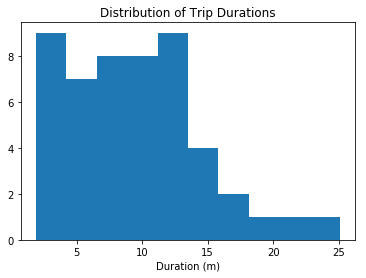

In [32]:
# load library
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import plotly.plotly as py
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

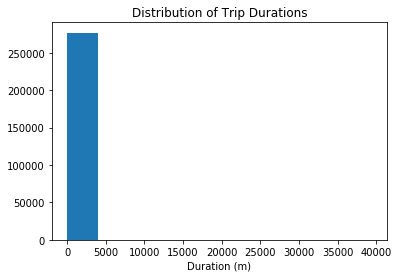

In [33]:
def histogram_trip(filename):
    new_trip = []
    data_files_n = './data/NYC-2016-Summary.csv'
    with open(data_files_n,'r') as f:
        trip_reader = csv.DictReader(f)
        for row in trip_reader:
            #print(row['duration'])
            new_trip.append(round(float(row['duration']),2))
        #print(new_trip[:20])
    plt.hist(new_trip)
    plt.title('Distribution of Trip Durations')
    plt.xlabel('Duration (m)')
    plt.show()
            

histogram_trip(data_file)

The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, we will use additional parameters with the `.hist()` function to limit the range of data that is plotted.

Let's Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in wer selected city. lets do  only for the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. Also,we will set the plots up so that bars are in five-minute wide intervals. 

For each group, let's find out the peak of each distribution? How would we describe the shape of each distribution?



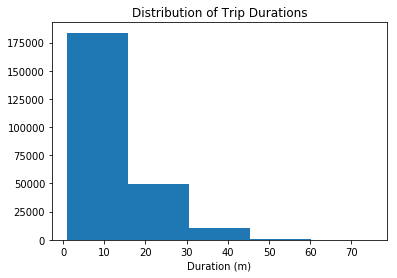

The Peak is at where X is:  6.5625


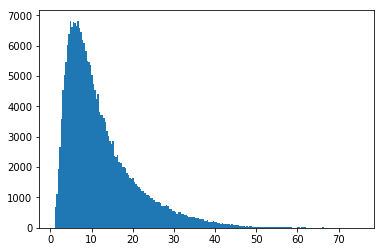

In [34]:


def histogram_subs(filename):
    new_trip = []
    data_files_n = './data/NYC-2016-Summary.csv'
    with open(data_files_n,'r') as f:
        trip_reader = csv.DictReader(f)
        for row in trip_reader:
            if row['user_type'] == 'Subscriber' and float(row['duration']) < 75:
                new_trip.append(round(float(row['duration']),2))
        #print(new_trip)
    plt.hist(new_trip,bins=5)
    plt.title('Distribution of Trip Durations')
    plt.xlabel('Duration (m)')
    plt.show()
    
    #Peak calculation
    #arr = np.array(list(new_trip))
    y,x,_=plt.hist(new_trip, bins=200)
    
    max_y = max(y)  # Find the maximum y value
    max_x = x[np.argmax(y)]  # Find the x value corresponding to the maximum y value
    print('The Peak is at where X is: ',max_x)
 

            

histogram_subs(data_file)



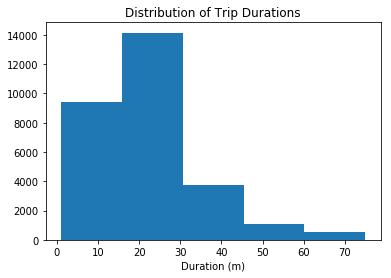

The Peak is at where X is:  21.7148


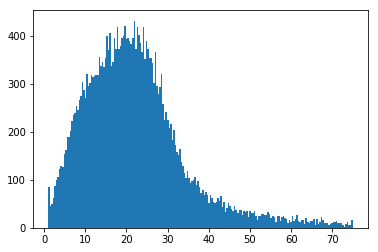

In [35]:

def histogram_cus(filename):
    new_trip = []
    data_files_n = './data/NYC-2016-Summary.csv'
    with open(data_files_n,'r') as f:
        trip_reader = csv.DictReader(f)
        for row in trip_reader:
            if row['user_type'] == 'Customer' and float(row['duration']) < 75:
                new_trip.append(round(float(row['duration']),2))
        #print(new_trip)
    plt.hist(new_trip,bins=5)
    plt.title('Distribution of Trip Durations')
    plt.xlabel('Duration (m)')
    plt.show()
    
        #Peak calculation
    #x,y,_=plt.hist(new_trip, bins=5)
    
     #Peak calculation
    arr = np.array(list(new_trip))
    y,x,_=plt.hist(arr, bins=200)
    
    max_y = max(y)  # Find the maximum y value
    max_x = x[np.argmax(y)]  # Find the x value corresponding to the maximum y value
    print('The Peak is at where X is: ',max_x)
    
    
    #print('The Peak at X where Y is at : ',x.max())
    
            

histogram_cus(data_file)

In [ ]:
**Answer**: 

1. where is the peak of each distribution?
    a. Subscribers:
            The Peak is at where X is:  6.5625
        
    b. customers:
            The Peak is at where X is:  21.7148         

2. How would we describe the shape of each distribution?
     Both Customer and Subscriber distribution is possibly non-symmetric, the fact that it has only one peak makes it unimodal, and it's skewed right (postive skewness).

So far, we've performed an initial exploration into the data available. we have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, we have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is our turn to continue the exploration in a different direction

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?


Let's Continue the investigation by exploring another question that could be answered by the data available.



No.of rides in the Month of Jan: 1901
No.of rides in the Month of Feb: 2394
No.of rides in the Month of Mar: 3719
No.of rides in the Month of Apr: 4567
No.of rides in the Month of May: 7211
No.of rides in the Month of Jun: 9794
No.of rides in the Month of Jul: 10286
No.of rides in the Month of Aug: 9810
No.of rides in the Month of Sep: 8700
No.of rides in the Month of Oct: 7160
No.of rides in the Month of Nov: 4811
No.of rides in the Month of Dec: 1778


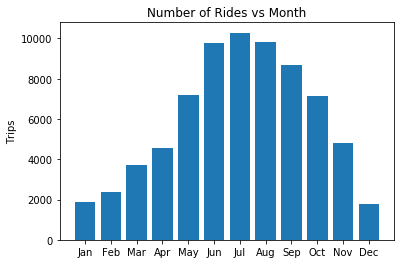

No.of rides in the Month of Jan-Mar: 8014
No.of rides in the Month of Apr-Jun: 21572
No.of rides in the Month of Jul-Sep: 28796
No.of rides in the Month of Oct-Dec: 13749


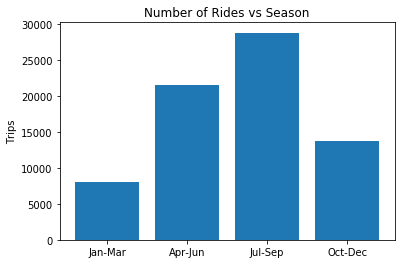

In [ ]:

def ride_month(filename):
    month_list = []
    month_dict = {}
    data_files_c = './data/Chicago-Divvy-2016.csv'
    with open(data_files_c,'r') as f:
        trip_reader = csv.DictReader(f)
        
        for row in trip_reader:       
            t = row['starttime']
            mymonth = datetime.strptime(t,'%m/%d/%Y %H:%M')
            month = mymonth.strftime('%b')
            month_list.append(month)
        
        my_dict = {i:month_list.count(i) for i in month_list}
        #print(my_dict)
    return my_dict
            
def month_list(filename):
    my_months = ride_month(filename)
    #print(my_months)
    months = {}
    months['Jan'] = my_months.get('Jan')
    months['Feb'] = my_months.get('Feb')
    months['Mar'] = my_months.get('Mar')
    months['Apr'] = my_months.get('Apr')
    months['May'] = my_months.get('May')
    months['Jun'] = my_months.get('Jun')
    months['Jul'] = my_months.get('Jul')
    months['Aug'] = my_months.get('Aug')
    months['Sep'] = my_months.get('Sep')
    months['Oct'] = my_months.get('Oct')
    months['Nov'] = my_months.get('Nov')
    months['Dec'] = my_months.get('Dec')
    
    print('No.of rides in the Month of Jan: {}'.format((my_months.get('Jan','No rides recorded'))))
    print('No.of rides in the Month of Feb: {}'.format((my_months.get('Feb','No rides recorded'))))
    print('No.of rides in the Month of Mar: {}'.format((my_months.get('Mar','No rides recorded'))))
    print('No.of rides in the Month of Apr: {}'.format((my_months.get('Apr','No rides recorded'))))
    print('No.of rides in the Month of May: {}'.format((my_months.get('May','No rides recorded'))))
    print('No.of rides in the Month of Jun: {}'.format((my_months.get('Jun','No rides recorded'))))
    print('No.of rides in the Month of Jul: {}'.format((my_months.get('Jul','No rides recorded'))))
    print('No.of rides in the Month of Aug: {}'.format((my_months.get('Aug','No rides recorded'))))
    print('No.of rides in the Month of Sep: {}'.format((my_months.get('Sep','No rides recorded'))))
    print('No.of rides in the Month of Oct: {}'.format((my_months.get('Oct','No rides recorded'))))
    print('No.of rides in the Month of Nov: {}'.format((my_months.get('Nov','No rides recorded'))))
    print('No.of rides in the Month of Dec: {}'.format((my_months.get('Dec','No rides recorded'))))
    
    
    plt.bar(range(len(months)), list(months.values()), align='center')
    plt.xticks(range(len(months)), list(months.keys()))
    plt.ylabel('Trips')
    plt.title('Number of Rides vs Month')
    plt.show()

    


def season_list(filename):
    my_season = ride_month(filename)
    
    season = {}
    season['Jan-Mar'] = my_season.get('Jan',0) + my_season.get('Feb',0) + my_season.get('Mar',0)
    season['Apr-Jun'] = my_season.get('Apr',0) + my_season.get('May',0) + my_season.get('Jun',0)
    season['Jul-Sep'] = my_season.get('Jul',0) + my_season.get('Aug',0) + my_season.get('Sep',0)
    season['Oct-Dec'] = my_season.get('Oct',0) + my_season.get('Nov',0) + my_season.get('Dec',0)
    
    
    
    print('No.of rides in the Month of Jan-Mar: {}'.format(season['Jan-Mar']))
    print('No.of rides in the Month of Apr-Jun: {}'.format(season['Apr-Jun']))
    print('No.of rides in the Month of Jul-Sep: {}'.format(season['Jul-Sep']))
    print('No.of rides in the Month of Oct-Dec: {}'.format(season['Oct-Dec']))
    
    plt.bar(range(len(season)), list(season.values()), align='center')
    plt.xticks(range(len(season)), list(season.keys()))
    plt.ylabel('Trips')
    plt.title('Number of Rides vs Season')
    plt.show()
            
month_list(data_file) 
season_list(data_file)


In [ ]:
def high_month(filename):
    high_month = ride_month(filename)
    max_m = max(high_month.items(), key=lambda x: x[1])
    print('The Highest month recorded with trips: ',max_m)
    
def high_season(filename):
    high_season = ride_month(filename)
    season1 = high_season.get('Jan',0) + high_season.get('Feb',0) + high_season.get('Mar',0)
    season2 = high_season.get('Apr',0) + high_season.get('May',0) + high_season.get('Jun',0)
    season3 = high_season.get('Jul',0) + high_season.get('Aug',0) + high_season.get('Sep',0)
    season4 = high_season.get('Oct',0) + high_season.get('Nov',0) + high_season.get('Dec',0)
    
    if int(season1) > int(season2) and int(season1) > int(season3) and int(season1) > int(season4):
        print('The Highest recorded season is between Jan-Mar with trips: {}'.format(season1))
    elif int(season2) > int(season1) and int(season2) > int(season3) and int(season2) > int(season4):
        print('The Highest recorded season is between Apr-Jun with trips: {}'.format(season2))
    elif int(season3) > int(season1) and int(season3) > int(season2) and int(season3) > int(season4):
        print('The Highest recorded season is between Jul-Sep with trips: {}'.format(season3))
    else:
        print('The Highest recorded season is between Oct-Dec with trips: {}'.format(season4))
            
high_season(data_file)
high_month(data_file)

In [ ]:
def ratio_subs(filename):
    month_list = []
    month_dict = {}
    data_files_c = './data/Chicago-Divvy-2016.csv'
    with open(data_files_c,'r') as f:
        trip_reader = csv.DictReader(f)
        
        for row in trip_reader: 
            if(row['usertype']) == 'Subscriber':
                t = row['starttime']
                mymonth = datetime.strptime(t,'%m/%d/%Y %H:%M')
                month = mymonth.strftime('%b')
                month_list.append(month)
        
        my_dict = {i:month_list.count(i) for i in month_list}
        #print(my_dict)
    return my_dict

def ratio_cus(filename):
    month_list = []
    month_dict = {}
    data_files_c = './data/Chicago-Divvy-2016.csv'
    with open(data_files_c,'r') as f:
        trip_reader = csv.DictReader(f)
        
        for row in trip_reader: 
            if(row['usertype']) == 'Customer':
                t = row['starttime']
                mymonth = datetime.strptime(t,'%m/%d/%Y %H:%M')
                month = mymonth.strftime('%b')
                month_list.append(month)
        
        my_dict = {i:month_list.count(i) for i in month_list}
        #print(my_dict)
    return my_dict

In [ ]:
def month_ratio(filename):
    month_subs = ratio_subs(filename)
    month_cus = ratio_cus(filename)
    
    months = {}
    
    months['Jan'] = float(month_subs.get('Jan',0) / month_cus.get('Jan',0))
    months['Feb'] = float(month_subs.get('Feb',0) / month_cus.get('Feb',0))
    months['Mar'] = float(month_subs.get('Mar',0) / month_cus.get('Mar',0))
    months['Apr'] = float(month_subs.get('Apr',0) / month_cus.get('Apr',0))
    months['May'] = float(month_subs.get('May',0) / month_cus.get('May',0))
    months['Jun'] = float(month_subs.get('Jun',0) / month_cus.get('Jun',0))
    months['Jul'] = float(month_subs.get('Jul',0) / month_cus.get('Jul',0))
    months['Aug'] = float(month_subs.get('Aug',0) / month_cus.get('Aug',0))
    months['Sep'] = float(month_subs.get('Sep',0) / month_cus.get('Sep',0))
    months['Oct'] = float(month_subs.get('Oct',0) / month_cus.get('Oct',0))
    months['Nov'] = float(month_subs.get('Nov',0) / month_cus.get('Nov',0))
    months['Dec'] = float(month_subs.get('Dec',0) / month_cus.get('Dec',0))
    
    
    print('Ratio of subscribers to customers in the Month of Jan: {}'.format(round(months['Jan'],2)))
    print('Ratio of subscribers to customers in the Month of Feb: {}'.format(round(months['Feb'],2)))
    print('Ratio of subscribers to customers in the Month of Mar: {}'.format(round(months['Mar'],2)))
    print('Ratio of subscribers to customers in the Month of Apr: {}'.format(round(months['Apr'],2)))
    print('Ratio of subscribers to customers in the Month of May: {}'.format(round(months['May'],2)))
    print('Ratio of subscribers to customers in the Month of Jun: {}'.format(round(months['Jun'],2)))
    print('Ratio of subscribers to customers in the Month of Jul: {}'.format(round(months['Jul'],2)))
    print('Ratio of subscribers to customers in the Month of Aug: {}'.format(round(months['Aug'],2)))
    print('Ratio of subscribers to customers in the Month of Sep: {}'.format(round(months['Sep'],2)))
    print('Ratio of subscribers to customers in the Month of Oct: {}'.format(round(months['Oct'],2)))
    print('Ratio of subscribers to customers in the Month of Nov: {}'.format(round(months['Nov'],2)))
    print('Ratio of subscribers to customers in the Month of Dec: {}'.format(round(months['Dec'],2)))

    
    plt.bar(range(len(months)), list(months.values()), align='center')
    plt.xticks(range(len(months)), list(months.keys()))
    plt.ylabel('Trips')
    plt.title('Ratio of Subscribers to Customers vs Month')
    plt.show()
    
month_ratio(data_file)

Ratio of subscribers to customers in the season of Jan-Mar: 44.74
Ratio of subscribers to customers in the season of Apr-Jun: 8.82
Ratio of subscribers to customers in the season of Jul-Sep: 7.35
Ratio of subscribers to customers in the season of Oct-Dec: 38.65


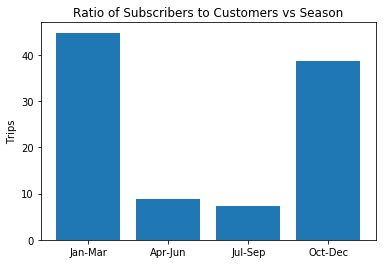

In [55]:
def season_ratio(filename):
    season_subs = ratio_subs(filename)
    season_cus = ratio_cus(filename)
    
    season= {}
    season['Jan-Mar'] = (season_subs.get('Jan',0) / season_cus.get('Jan',0)) + (season_subs.get('Feb',0) / season_cus.get('Feb',0)) + (season_subs.get('Mar',0) / season_cus.get('Mar',0))
    season['Apr-Jun'] = (season_subs.get('Apr',0) / season_cus.get('Apr',0)) + (season_subs.get('May',0) / season_cus.get('May',0)) + (season_subs.get('Jun',0) / season_cus.get('Jun',0))
    season['Jul-Sep'] = (season_subs.get('Jul',0) / season_cus.get('Jul',0)) + (season_subs.get('Aug',0) / season_cus.get('Aug',0)) + (season_subs.get('Sep',0) / season_cus.get('Sep',0))
    season['Oct-Dec'] = (season_subs.get('Oct',0) / season_cus.get('Oct',0)) + (season_subs.get('Nov',0) / season_cus.get('Nov',0)) + (season_subs.get('Dec',0) / season_cus.get('Dec',0))
    
    
    print('Ratio of subscribers to customers in the season of Jan-Mar: {}'.format(round(season['Jan-Mar'],2)))
    print('Ratio of subscribers to customers in the season of Apr-Jun: {}'.format(round(season['Apr-Jun'],2)))
    print('Ratio of subscribers to customers in the season of Jul-Sep: {}'.format(round(season['Jul-Sep'],2)))
    print('Ratio of subscribers to customers in the season of Oct-Dec: {}'.format(round(season['Oct-Dec'],2)))

    plt.bar(range(len(season)), list(season.values()), align='center')
    plt.xticks(range(len(season)), list(season.keys()))
    plt.ylabel('Trips')
    plt.title('Ratio of Subscribers to Customers vs Season')
    plt.show()
    
season_ratio(data_file)

In [ ]:

**Answer**: 

1. Trip Duration Month wise (Trips vs Months)
2. Trip Duration Season wise (Trips vs Seasons)
3. Highest Trip Duration of the Month in a year
4. Highest Trip Duration of the Season in a year
5. Trip Duration Ratio b/w subscribers to customers - Month wise
6. Trip Duration Ratio b/w subscribers to customers - Season wise

<a id='conclusions'></a>
## Conclusions

In this project we have assessed Python to explore the dataset related to BikeShare systems for three major cities in the United States.we have performed data wrangling to unify the format of data from the three systems and write code to compute descriptive statistics.we also used libraries like Pandas, numpy to wrangle the data and matplotlib to visually analyse the wrangled dataset.
 



In [2]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])

0